# Lesson 8 - Code writing with AI
In this lesson we will get data on Israel top 60 cities population and draw it on a map.
The data from: https://simplemaps.com/data/il-cities and save it as a GoogleSheet, is downloaded to File: il.csv


In [8]:
# Read the file il.csv to a DataFrame
import pandas as pd
df = pd.read_csv('il.csv')
df.head()


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Tel Aviv-Yafo,32.0800,34.7800,Israel,IL,Tel Aviv,admin,1388400.0,460613.0
1,Jerusalem,31.7789,35.2256,Israel,IL,Jerusalem,primary,936425.0,936425.0
2,Haifa,32.8192,34.9992,Israel,IL,Haifa,admin,600000.0,282831.0
3,Rishon LeẔiyyon,31.9500,34.8000,Israel,IL,Central,NaN,249860.0,249860.0
4,Petaẖ Tiqwa,32.0889,34.8864,Israel,IL,Central,NaN,236169.0,236169.0


In [9]:
# Display the data types of the columns
df.dtypes


city                  object
lat                  float64
lng                  float64
country               object
iso2                  object
admin_name            object
capital               object
population           float64
population_proper    float64
dtype: object

In [10]:
# Data wrangling
df['lat'] = df['lat'].astype(float)
df['lng'] = df['lng'].astype(float)
df.dtypes


city                  object
lat                  float64
lng                  float64
country               object
iso2                  object
admin_name            object
capital               object
population           float64
population_proper    float64
dtype: object

In [11]:
# Check for missing values
df.isnull().sum()


city                  0
lat                   0
lng                   0
country               0
iso2                  0
admin_name            0
capital              51
population            3
population_proper     3
dtype: int64

In [12]:
# Handle missing values
# drop column: capital
df = df.drop('capital', axis=1)
# drop rows with missing values
df = df.dropna()
df.isnull().sum()

    

city                 0
lat                  0
lng                  0
country              0
iso2                 0
admin_name           0
population           0
population_proper    0
dtype: int64

In [13]:
# Map the cities each with a circle size according to the population
import folium
m = folium.Map(location=[31.5, 34.9], zoom_start=8)
for i in range(len(df)):
    folium.Circle(
        location=[df.iloc[i]['lat'], df.iloc[i]['lng']],
        radius=df.iloc[i]['population']/1000,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)
m


    


In [24]:
# Output the map to a file
m.save('map.html')
    



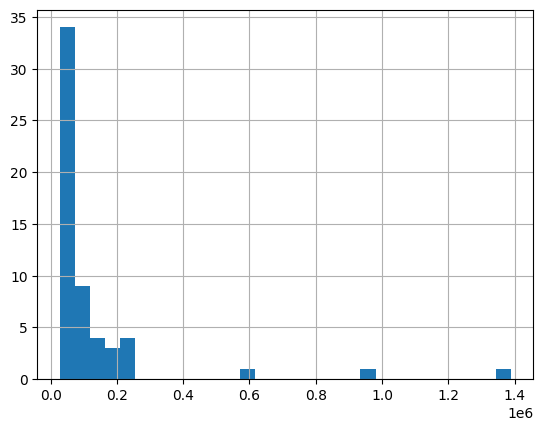

In [15]:
# exploratory data analysis
import matplotlib.pyplot as plt
df['population'].hist(bins=30)
plt.show()


 

In [16]:
# how many cities are there in the data
df['city'].nunique()


57

In [17]:
# sort the cities by population
df = df.sort_values(by='population', ascending=False)
df.head()

,city,lat,lng,country,iso2,admin_name,population,population_proper
0,Tel Aviv-Yafo,32.0800,34.7800,Israel,IL,Tel Aviv,1388400.0,460613.0
1,Jerusalem,31.7789,35.2256,Israel,IL,Jerusalem,936425.0,936425.0
2,Haifa,32.8192,34.9992,Israel,IL,Haifa,600000.0,282831.0
3,Rishon LeẔiyyon,31.9500,34.8000,Israel,IL,Central,249860.0,249860.0
4,Petaẖ Tiqwa,32.0889,34.8864,Israel,IL,Central,236169.0,236169.0


In [19]:
# What is the percent of population in the top 3 cities
top3 = df.iloc[:3]['population'].sum()
total = df['population'].sum()
top3 / total * 100


np.float64(39.869848848108184)

In [21]:
# Which cities are 50 km from Tel Aviv
from geopy.distance import geodesic
tel_aviv = (32.0853, 34.7818)
cities = []
for i in range(len(df)):
    city = (df.iloc[i]['lat'], df.iloc[i]['lng'])
    if geodesic(tel_aviv, city).km < 50:
        cities.append(df.iloc[i]['city'])
cities


['Tel Aviv-Yafo',
 'Rishon LeẔiyyon',
 'Petaẖ Tiqwa',
 'Ashdod',
 'Netanya',
 'Holon',
 'Bené Beraq',
 'Ramat Gan',
 'Reẖovot',
 'Bat Yam',
 'Bet Shemesh',
 'Kefar Sava',
 'Modi‘in Makkabbim Re‘ut',
 'Hadera',
 'Herẕliyya',
 'Lod',
 'Ramla',
 'Ra‘ananna',
 'Givatayim',
 'Hod HaSharon',
 'Rosh Ha‘Ayin',
 'Nes Ẕiyyona',
 'El‘ad',
 'Ramat HaSharon',
 'Eṭ Ṭaiyiba',
 'Ben Zakkay',
 'Pardés H̱anna Karkur',
 'Qiryat Ono',
 'Or Yehuda',
 'Be’er Ya‘aqov',
 'Yehud',
 'Kefar Yona']

In [22]:
# Which percentage of the population is in cities 50 km from Tel Aviv
pop = 0
for i in range(len(df)):
    city = (df.iloc[i]['lat'], df.iloc[i]['lng'])
    if geodesic(tel_aviv, city).km < 50:
        pop += df.iloc[i]['population']
pop / total * 100


np.float64(60.84185349591572)

# Summary
In this lesson we learned how to use AI to write code.
We got data
We cleaned the data
We plotted the data on a map
We did exploratory data analysis
We calculated some statistics
We answered some questions
